In [73]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import pickle
import os
from kernel import precompute_Kzz
from loss import compute_mean_factor
from latents import compute_latent_means
import numpy as np
import math

In [74]:
results_filename = os.path.join(f'./results/', f'demo2Dlatents_twoareasimfit_run002_estimatedModel.pickle')
with open(results_filename, "rb") as f:
    results = pickle.load(f)


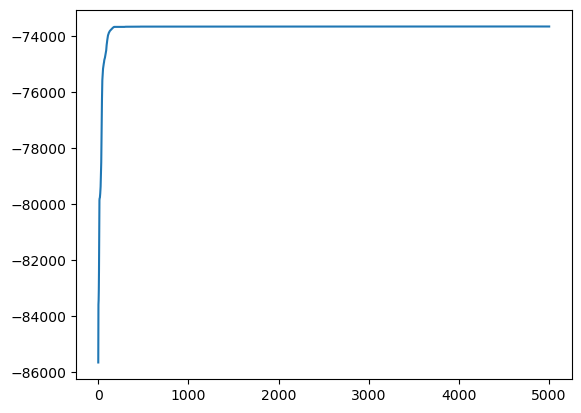

In [75]:
plt.figure()
plt.plot([jnp.where(i >-1e5,i,jnp.nan) for i in results['lower_bound_hist']])
# plt.plot(results['lower_bound_hist'])

In [76]:
print(f'start elbo = {results["lower_bound_hist"][0]}')

start elbo = -85662.53125


In [77]:
print(f'end elbo = {results["lower_bound_hist"][-1]}')

end elbo = -73646.2578125


In [78]:
time_est = jnp.linspace(0,20,2000)
time_est = time_est[jnp.newaxis,:]
time_est = jnp.repeat(time_est,50,axis=0)
Kzz_est = precompute_Kzz(results['params']['ind_points_locs'], results['params']['kernel_params'])
Kzz_cho_est = jax.scipy.linalg.cholesky(Kzz_est,lower=True)
mean_factor = compute_mean_factor(Kzz_cho_est, results['params']['vMean'])
latent_means_est = compute_latent_means(results['params']['kernel_params'],results['params']['ind_points_locs'],mean_factor,time_est)

In [79]:
latent_func_1 = lambda t: 1.5 * np.exp(-0.5 *((t-10) ** 2 / 12)) * np.sin(2 * math.pi * (1/12) * t)
latent_func_2 = lambda t: 0.8 * np.exp(-0.5*((t-5) ** 2/8)) * np.cos(2 * math.pi * .12 * t )  + 0.9 * np.exp(-0.5 * ((t-10)**2/12)) * np.sin(2 * math.pi * t * 0.1 + 1.5)

latent_func_3 = lambda t: 0.9 * np.exp(-0.5*((t-12) ** 1/6)) * np.sin(2 * math.pi * (1/12) * t + 1.0)
latent_func_4 = lambda t: 0.8 * np.exp(-0.5*((t-2) ** 2/4)) * np.cos(2 * math.pi * .12 * t + 0.3 )  + 0.2 * np.exp(-0.5 * ((t-8)**2/12)) * np.sin(2 * math.pi * t * 0.1 - 0.5)

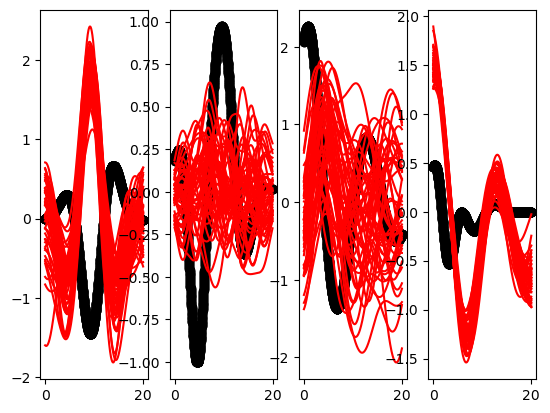

In [71]:
fig, axs = plt.subplots(nrows=1,ncols=4,sharex=True)
axs[0].scatter(time_est[0],latent_func_1(time_est[0]),c='k')
axs[0].plot(time_est[0],latent_means_est[0,0:50,:].T,'-r')
axs[1].scatter(time_est[0],latent_func_2(time_est[0]),c='k')
axs[1].plot(time_est[0],latent_means_est[1,0:50,:].T,'-r')
axs[2].scatter(time_est[0],latent_func_3(time_est[0]),c='k')
axs[2].plot(time_est[0],latent_means_est[2,0:50,:].T,'-r')
axs[3].scatter(time_est[0],latent_func_4(time_est[0]),c='k')
axs[3].plot(time_est[0],latent_means_est[3,0:50,:].T,'-r')
# plt.plot(time_est[0],latent_means_est[1,0,:])

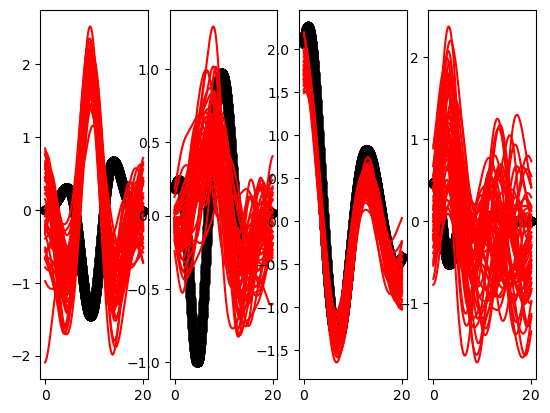

In [80]:
fig, axs = plt.subplots(nrows=1,ncols=4,sharex=True)
axs[0].scatter(time_est[0],latent_func_1(time_est[0]),c='k')
axs[0].plot(time_est[0],latent_means_est[0,0:50,:].T,'-r')
axs[1].scatter(time_est[0],latent_func_2(time_est[0]),c='k')
axs[1].plot(time_est[0],latent_means_est[1,0:50,:].T,'-r')
axs[2].scatter(time_est[0],latent_func_3(time_est[0]),c='k')
axs[2].plot(time_est[0],latent_means_est[2,0:50,:].T,'-r')
axs[3].scatter(time_est[0],latent_func_4(time_est[0]),c='k')
axs[3].plot(time_est[0],latent_means_est[3,0:50,:].T,'-r')

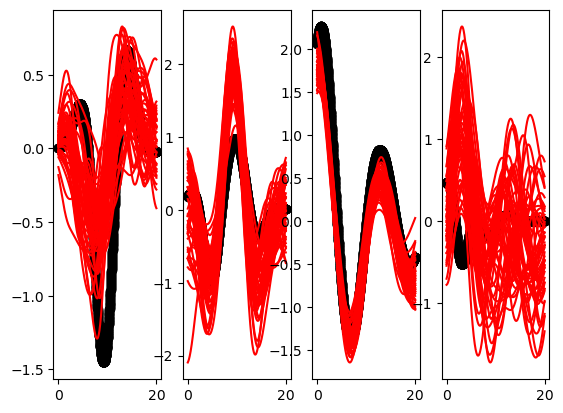

In [82]:
fig, axs = plt.subplots(nrows=1,ncols=4,sharex=True)
axs[0].scatter(time_est[0],latent_func_1(time_est[0]),c='k')
axs[0].plot(time_est[0],-1*latent_means_est[1,0:50,:].T,'-r')

axs[1].scatter(time_est[0],latent_func_2(time_est[0]),c='k')
axs[1].plot(time_est[0],latent_means_est[0,0:50,:].T,'-r')
axs[2].scatter(time_est[0],latent_func_3(time_est[0]),c='k')
axs[2].plot(time_est[0],latent_means_est[2,0:50,:].T,'-r')
axs[3].scatter(time_est[0],latent_func_4(time_est[0]),c='k')
axs[3].plot(time_est[0],latent_means_est[3,0:50,:].T,'-r')

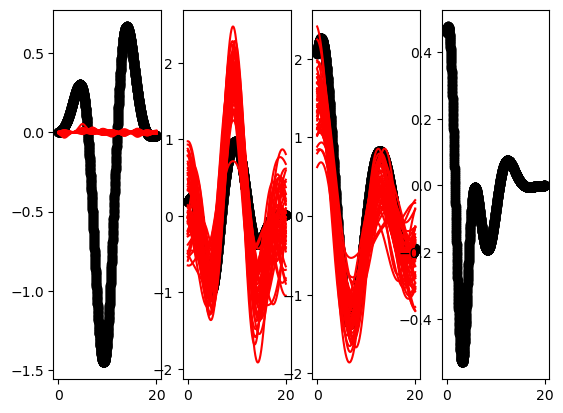

In [64]:
fig, axs = plt.subplots(nrows=1,ncols=4,sharex=True)
axs[0].scatter(time_est[0],latent_func_1(time_est[0]),c='k')
axs[0].plot(time_est[0],latent_means_est[0,0:50,:].T,'-r')
axs[1].scatter(time_est[0],latent_func_2(time_est[0]),c='k')
axs[1].plot(time_est[0],latent_means_est[1,0:50,:].T,'-r')
axs[2].scatter(time_est[0],latent_func_3(time_est[0]),c='k')
axs[2].plot(time_est[0],-1*latent_means_est[3,0:50,:].T,'-r')
axs[3].scatter(time_est[0],latent_func_4(time_est[0]),c='k')


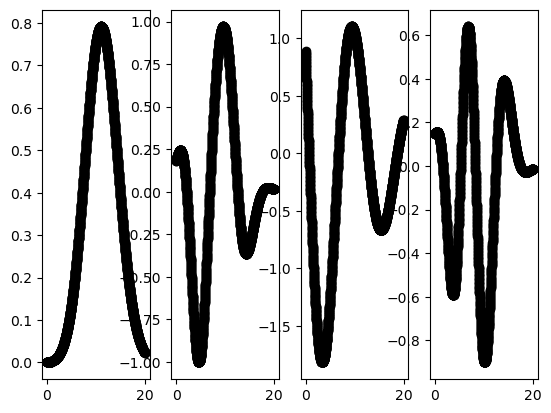

In [48]:
fig, axs = plt.subplots(nrows=1,ncols=4,sharex=True)
axs[0].scatter(time_est[0],latent_func_1(time_est[0]),c='k')
# axs[0].plot(time_est[0],latent_means_est[0,0:50,:].T,'-r')
axs[1].scatter(time_est[0],latent_func_2(time_est[0]),c='k')
# axs[1].plot(time_est[0],latent_means_est[1,0:50,:].T,'-r')
axs[2].scatter(time_est[0],latent_func_3(time_est[0]),c='k')
# axs[2].plot(time_est[0],latent_means_est[2,0:50,:].T,'-r')
axs[3].scatter(time_est[0],latent_func_4(time_est[0]),c='k')
# axs[3].plot(time_est[0],latent_means_est[3,0:50,:].T,'-r')

In [53]:
latent_func_1 = lambda t: 1.5 * np.exp(-0.5 *((t-10) ** 2 / 12)) * np.sin(2 * math.pi * (1/12) * t)
latent_func_2 = lambda t: 0.8 * np.exp(-0.5*((t-5) ** 2/8)) * np.cos(2 * math.pi * .12 * t )  + 0.9 * np.exp(-0.5 * ((t-10)**2/12)) * np.sin(2 * math.pi * t * 0.1 + 1.5)

latent_func_3 = lambda t: 0.9 * np.exp(-0.5*((t-12) ** 1/6)) * np.sin(2 * math.pi * (1/12) * t + 1.0)
latent_func_4 = lambda t: 0.8 * np.exp(-0.5*((t-2) ** 2/4)) * np.cos(2 * math.pi * .12 * t + 0.3 )  + 0.2 * np.exp(-0.5 * ((t-8)**2/12)) * np.sin(2 * math.pi * t * 0.1 - 0.5)

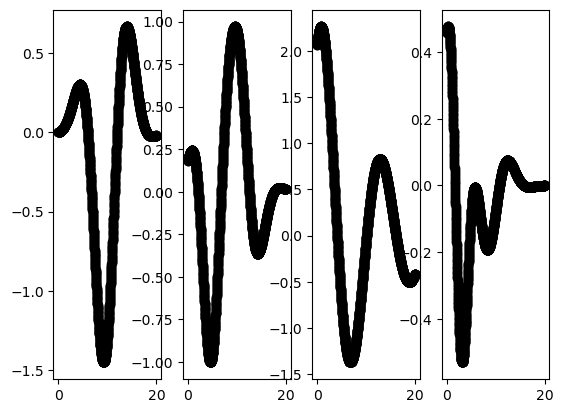

In [54]:
fig, axs = plt.subplots(nrows=1,ncols=4,sharex=True)
axs[0].scatter(time_est[0],latent_func_1(time_est[0]),c='k')
axs[1].scatter(time_est[0],latent_func_2(time_est[0]),c='k')
axs[2].scatter(time_est[0],latent_func_3(time_est[0]),c='k')
axs[3].scatter(time_est[0],latent_func_4(time_est[0]),c='k')

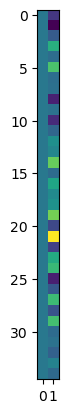

In [30]:
plt.figure()
plt.imshow(results['params']['C1'])

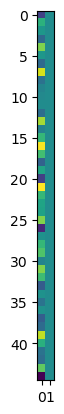

In [31]:
plt.figure()
plt.imshow(results['params']['C2'])

In [ ]:
seed = 42
key = jax.random.PRNGKey(seed)

In [ ]:
from cholesky import set_lower_triangular
key,subkey = jax.random.split(key)
v = jax.random.normal(key=subkey,shape=(10,))
C = set_lower_triangular(v)


In [ ]:
print(C)

In [ ]:
jit_lower = jax.jit(set_lower_triangular)
C = jit_lower(v)


In [ ]:
def optim_func(spike_times, quad, trunc_indices):
    return jax.jit(lambda x: compute_elbo(x, spike_times,quad, trunc_indices))